<a href="https://colab.research.google.com/github/riszwinger/tensorflow_cert/blob/main/basic/FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
print('X_train Shape: {}, X_Test shape: {}'.format(X_train.shape,X_test.shape))
print('y_train Shape: {}, y_test shape: {}'.format(y_train.shape,y_test.shape))

4423680/4422102 [==============================] - 0s 0us/step
X_train Shape: (60000, 28, 28), X_Test shape: (10000, 28, 28)
y_train Shape: (60000,), y_test shape: (10000,)


In [4]:
#tf.keras.datasets.fashion_mnist.load_data()

In [5]:
label_mapping={0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
print(label_mapping)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


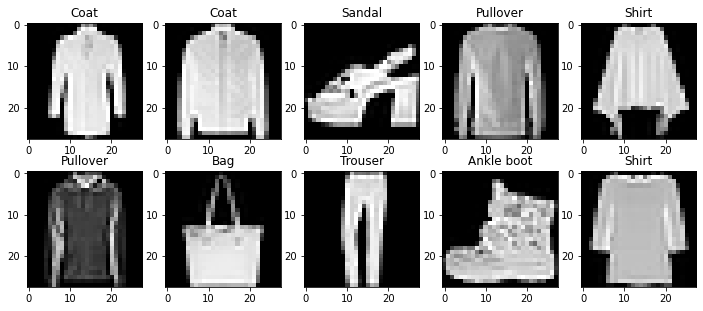

In [6]:
fig,ax=plt.subplots(2,5,figsize=(12,5))
for i in range(2):
  for j in range(5):
    #print(i,j)
    val=np.random.randint(0,10000)
    ax[i,j].imshow(X_train[val],cmap='gray' )
    ax[i,j].set_title(label_mapping[y_train[val]],fontsize=12, )
plt.show()

## Normalizing Data

In [7]:
X_train,X_test=X_train/255.0,X_test/255.0

In [8]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#model.add(tf.keras.layers.Dense(512,activation='relu'))

model.add(tf.keras.layers.Dense(1024,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [9]:
loss_fxn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss=loss_fxn,metrics=['accuracy'])


In [10]:
history=model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4719 - accuracy: 0.8318
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3556 - accuracy: 0.8692
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3211 - accuracy: 0.8826
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2966 - accuracy: 0.8893
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2774 - accuracy: 0.8972


## Test Accuracy ~87 % ( not bad eh!)

In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3776 - accuracy: 0.8665


[0.3775775730609894, 0.8665000200271606]

## error Analysis

In [12]:
predictions=np.argmax(tf.nn.softmax(model.predict(X_test)).numpy(),axis=1)
predictions.shape

(10000,)

In [13]:
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [14]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [15]:
d1=pd.DataFrame()
d1['Predicted']=predictions
d1['Actual']=y_test
d1.loc[d1.Predicted!=d1.Actual].head()


,Predicted,Actual
12,5,7
20,0,2
23,5,9
25,2,4
29,6,3


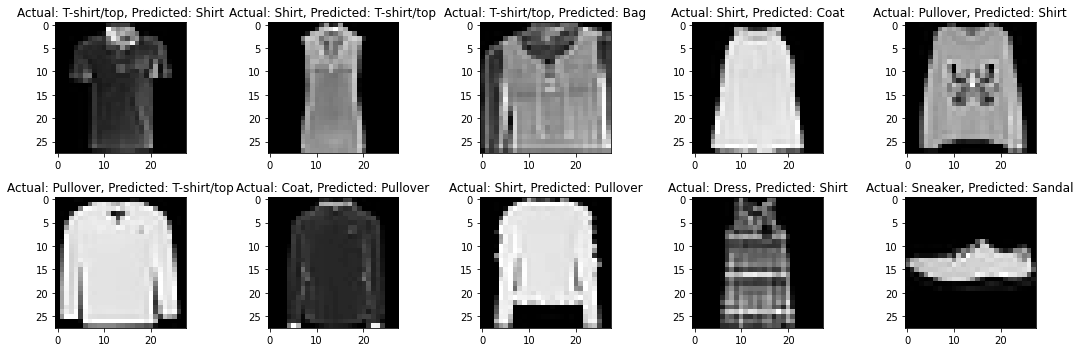

In [16]:
fig,ax=plt.subplots(2,5,figsize=(15,5))
for i in range(2):
  for j in range(5):
    #print(i,j)
    val=np.random.choice(d1.loc[d1.Predicted!=d1.Actual].index)
    #print(val)
    ax[i,j].imshow(X_test[val],cmap='gray' )
    tit="Actual: {}, Predicted: {}".format(label_mapping[d1.iloc[val]['Actual']],label_mapping[d1.iloc[val]['Predicted']])
    ax[i,j].set_title(tit,fontsize=12, )
plt.tight_layout()
plt.show()

## Callbacks

In [17]:
class myCallBacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('acc')>0.80:
      print("Too good to be true")
      self.model.stop_training=True

In [18]:
callbacks=myCallBacks()

In [19]:
model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model1.add(tf.keras.layers.Dense(128,activation='relu'))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(10))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
loss_fxn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [21]:
model1.compile(optimizer='adam',loss=loss_fxn,metrics=['acc'])

In [22]:
model1.fit(X_train,y_train,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5323 - acc: 0.8128
Too good to be true


## Convolution

In [23]:
model_con=tf.keras.models.Sequential()
model_con.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model_con.add(tf.keras.layers.MaxPool2D((2,2)))
model_con.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model_con.add(tf.keras.layers.MaxPool2D((2,2)))

model_con.add(tf.keras.layers.Flatten())
model_con.add(tf.keras.layers.Dense(128,activation='relu'))
model_con.add(tf.keras.layers.Dense(10))
model_con.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

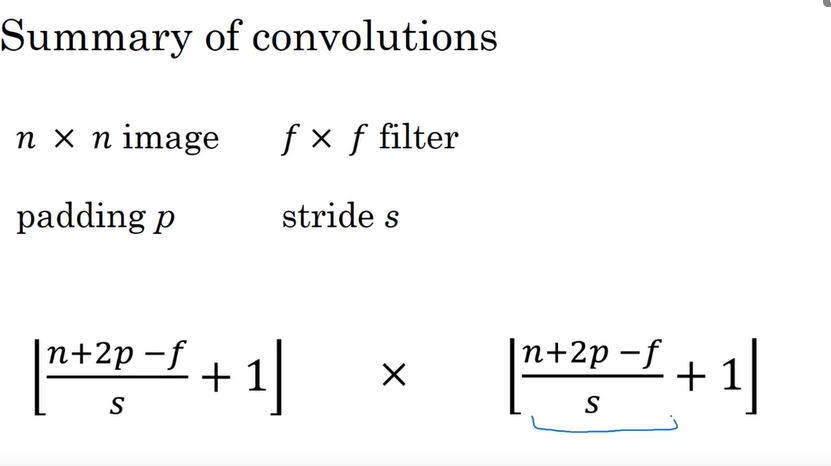

$ n{_h}=28, p=0, f=3, s=1$
<br>output shape =26



---
Max Pool 2D: didide by 2 
<br>Output shape 13

---
$ n{_h}=13, p=0, f=3, s=1$
<br>output shape =11

---









In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
X_train=X_train.reshape(60000, 28, 28,1)
X_test=X_test.reshape(10000, 28, 28,1)

In [26]:
model_con.compile(optimizer='adam',loss=loss_fxn,metrics=['acc'])
history=model_con.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 34s 3ms/step - loss: 0.4396 - acc: 0.8404
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2940 - acc: 0.8919
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2482 - acc: 0.9081
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2150 - acc: 0.9205
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1865 - acc: 0.9302


In [27]:
model_con.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2622 - acc: 0.9127


[0.26215746998786926, 0.9126999974250793]

In [28]:
model_con.inputs

[<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>]

In [29]:
model_con.layers

# Awesome Website

[link](https://keras.io/guides/sequential_model/)

In [30]:
feature_exractor=tf.keras.Model(inputs=model_con.inputs,outputs=[layer.output for layer in model_con.layers])


In [31]:
features=feature_exractor(X_train[0].reshape(1,28,28,1))
len(features)

7

In [32]:
features[0].shape

TensorShape([1, 26, 26, 64])